In [4]:
import math
from IPython.core import display as ICD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
"""os.chdir("/content/drive/My Drive/0.Temas IOP Grupo 1/")
!ls"""

'os.chdir("/content/drive/My Drive/0.Temas IOP Grupo 1/")\n!ls'

In [5]:
def continous_grid(df, X  ,n_rows, n_cols, bins=10, size = 10, size_ratio = 1,alpha=1,hue_col_name=None):
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(size , size*size_ratio) )
    iter_variables = iter(X)
    counter = 0

    for i in range(n_rows):
            for j in range(n_cols):
                ax = axes[i][j]

                if counter < 2*len(X):
                    if j%2==0: 
                        var_name = next(iter_variables)
                        sns.FacetGrid(df, hue=hue_col_name).map(sns.distplot, var_name ,bins=bins, ax=ax)
                        ax.set_title(var_name+" Distribution")
                        # ax.legend(loc="best")
                    else: 
                        ax.set_axis_off()    
                        # sns.scatterplot(x=var_name, y=y, hue=hue_col_name, data =df, alpha=alpha, ax=ax)
                        # ax.set_title(var_name + " Scatterplot")
                        
                else:
                    ax.set_axis_off()

                counter += 1

    fig.tight_layout()
    sns.despine()

In [6]:
def discrete_grid(df, X ,n_rows, n_cols, size = 4, size_ratio = 1,alpha=1,hue_col_name=None, s=10):
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(size , size*size_ratio))

    iter_variables = iter(X)
    counter = 0          

    for i in range(n_rows):
            for j in range(n_cols):
                ax = axes[i][j]

                if counter < 2*len(X):
                    if j%2==0: 
                        var_name = next(iter_variables)
                        sns.countplot(x= var_name , hue = hue_col_name ,
                                      data = df , ax=ax, palette ="muted")
                        ax.set_title(var_name+" Countplot")
                        # ax.legend(loc="best")
                    else:
                        ax.set_axis_off()

                        # sns.stripplot(x = var_name , y = y , hue = hue_col_name, s=s,
                        #                data = df , #scale="count", scale_hue=False
                        #                alpha = alpha, ax = ax, palette="muted")

                        # sns.violinplot( x = var_name , y = y , hue = hue_col_name,
                        #                data = df , #scale="count", scale_hue=False
                        #                alpha = alpha, ax = ax, palette="muted")
                        
                        # ax.legend().set_visible(False) # esto debido a que en test nunca tenemos y, solo X
                        # ax.set_title(var_name + " Stripplot")

                else:
                    ax.set_axis_off()

                counter += 1

    fig.tight_layout()
    sns.despine()

# EDA

---
## 1. Cargando e interpretando data


In [8]:
data = pd.read_csv("LimaBank_Data_Grupo1.csv")

In [9]:
#se descartó (no eliminó) codigo de clientes por no ser util para el análisis
variables_continuas=['INGRESO',
                     'EDAD',
                     'EDAD_2',
                     'SBS_DEUTOTAL',
                     'Banco1_DEUTOTAL',
                     'Banco2_DEUTOTAL',
                     'Banco3_DEUTOTAL',
                     'Banco4_DEUTOTAL',
                     'OTROS_DEUTOTAL',]

variables_discretas=['FORMAL',
                     'DIGITAL',
                     'FLG_SBS_201909',
                     'FLG_MD_NEGATIVO',
                     'FLG_DEUDASBS',
                     'CANTIDAD_PRODUCTOS',
                     'FLG_SEGUROS',
                     'FLG_ACTIVOS',
                     'FLG_PASIVOS',
                     'FLG_INVERSION',
                     'FLG_PASIV_INV',]

variables_ordinales=['EDU',
                     'TIPNIVELEDUCACIONAL',
                     'PERFIL_VINCULACION',
                     'SEMENTO_RIESGO',
                     ]

variables_nominales=['TIPESTCIVIL',
                     'CODPAISNACIONALIDAD',
                     'DESTIPPROVINCIA',
                     'DIGITALIDAD',]

In [10]:
_ = pd.concat([data.dtypes.to_frame(),
           data.sample(3).T]  ,
          axis=1)

_.columns=["dtype","example0","example1","example2"]
ICD.display(_)

,dtype,example0,example1,example2
CODIGO_CLIENTE,int64,5116874,8029511,3404730
TIPESTCIVIL,object,CAS,SOL,CAS
CODPAISNACIONALIDAD,object,PER,PER,PER
INGRESO,int64,8000,2310,5624
EDAD,int64,37,35,44
EDU,int64,4,4,4
FORMAL,int64,1,1,1
DIGITAL,int64,2,1,2
DESTIPPROVINCIA,object,Provincia,Lima,Lima
EDAD_2,float64,37,35,44


In [11]:
# todos los códigos aparecen una sola vez
data.CODIGO_CLIENTE.value_counts().value_counts()

1    100000
Name: CODIGO_CLIENTE, dtype: int64

---
## 2. VACÍOS

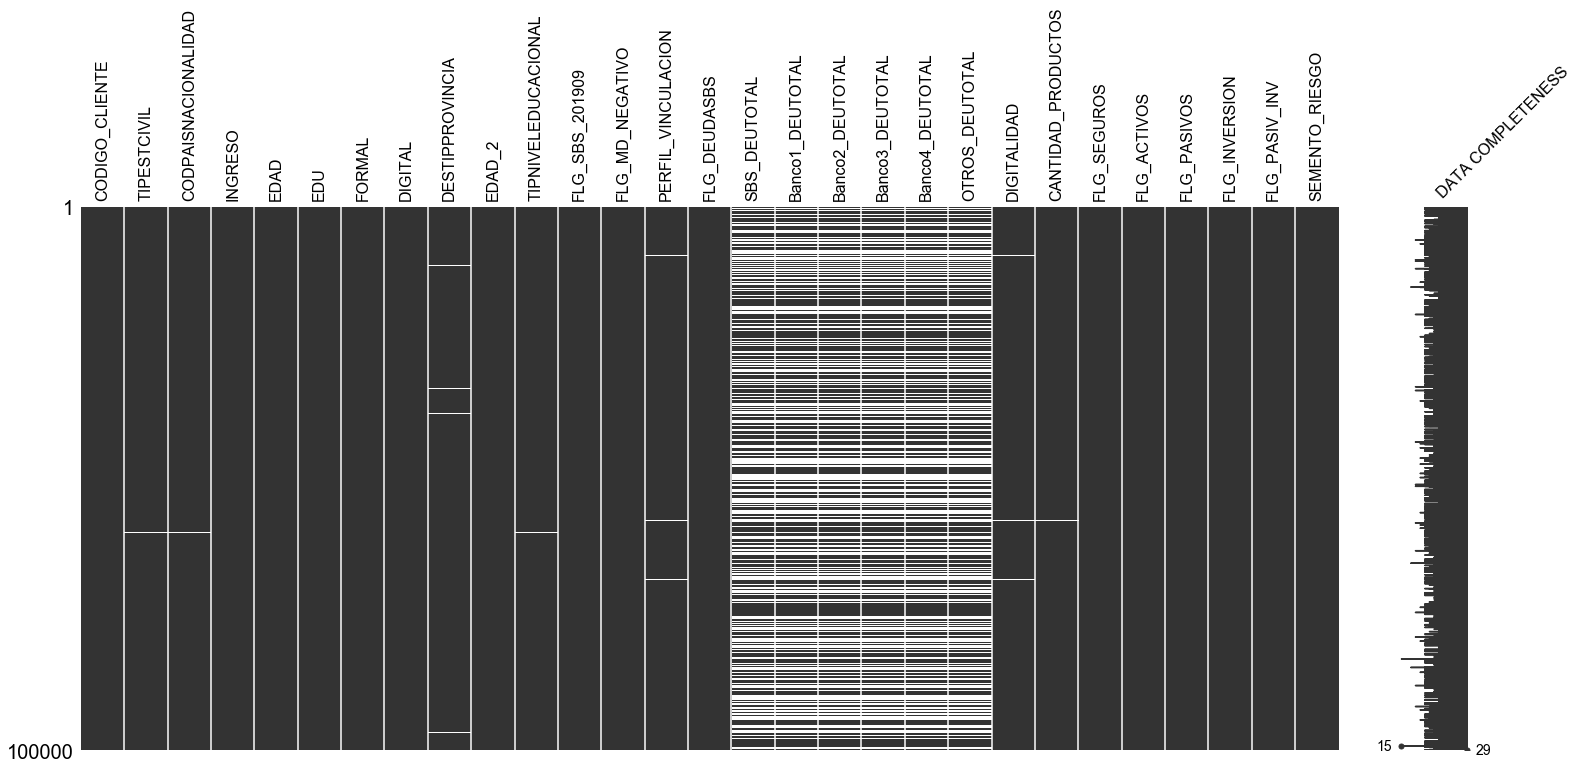

In [12]:
# matriz de vacios
g = msno.matrix(data,labels=True , color=(0.2,0.2,0.2))
sns.set_style("dark")
sns.set_context("paper")
plt.xticks(rotation=90, horizontalalignment='center')
plt.show()

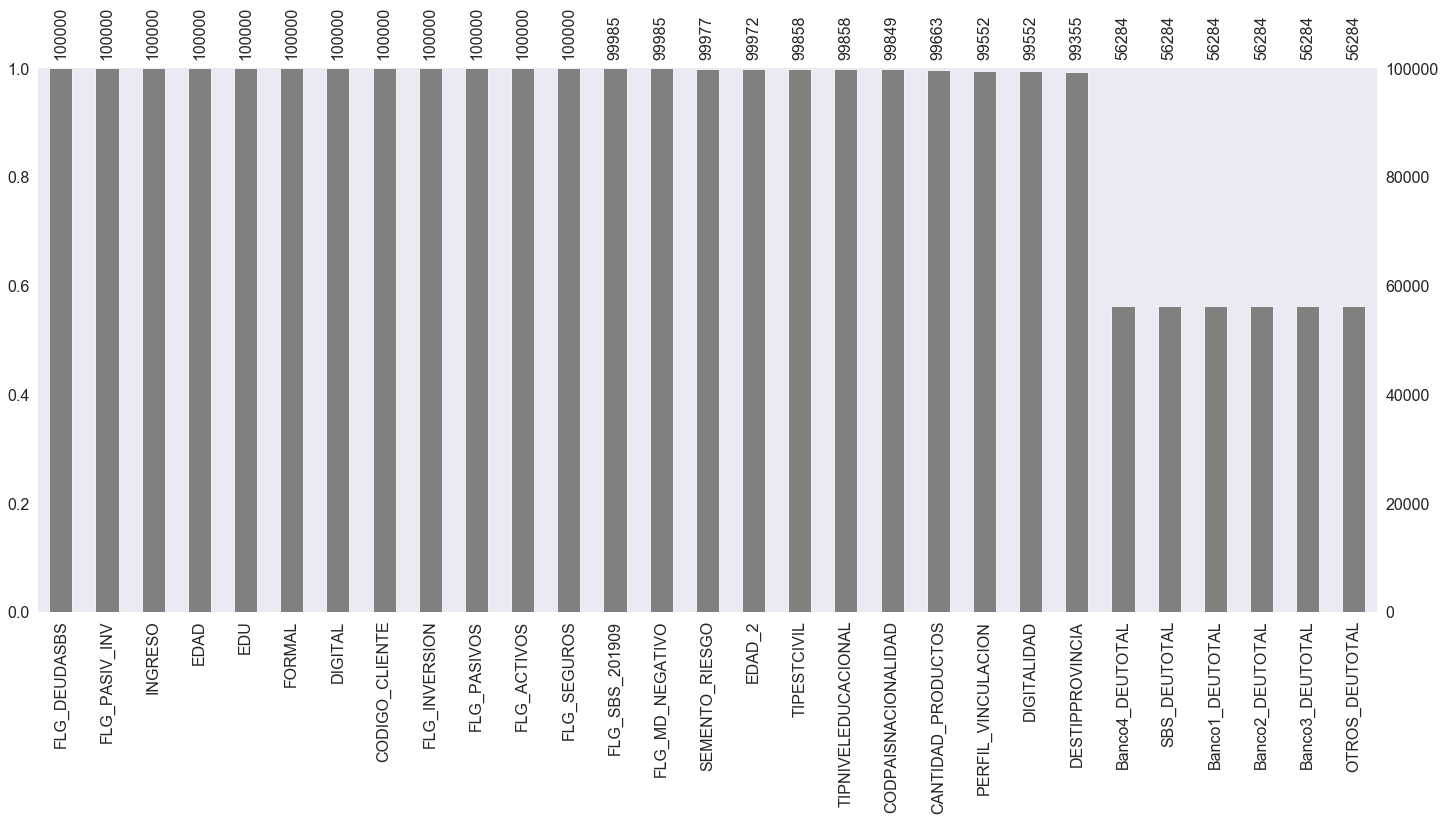

In [13]:
# barras ordenadas
g = msno.bar(data,sort="descending",color="gray",labels=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='center')

sns.set_style("darkgrid")
plt.xticks(rotation=90, horizontalalignment='center')
plt.show()

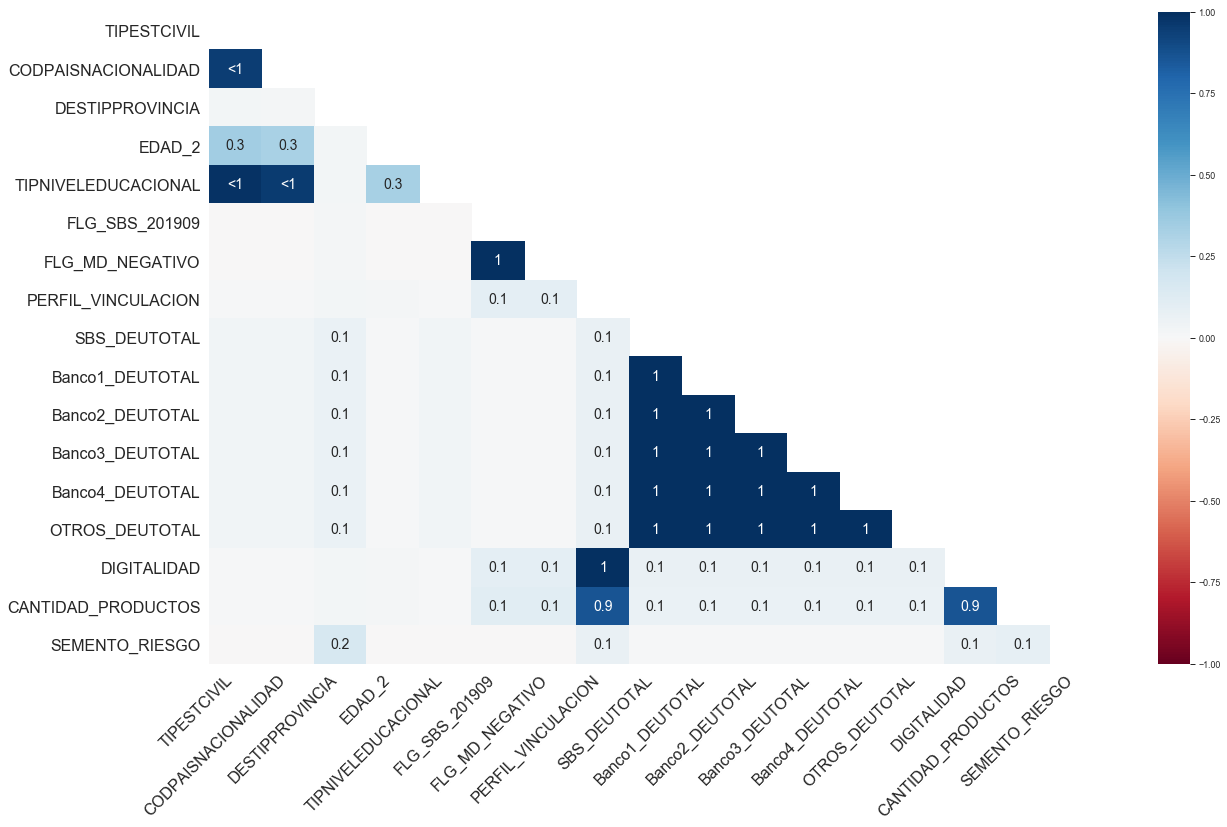

In [14]:
# correlacion de vacios
g= msno.heatmap(data)
plt.show()

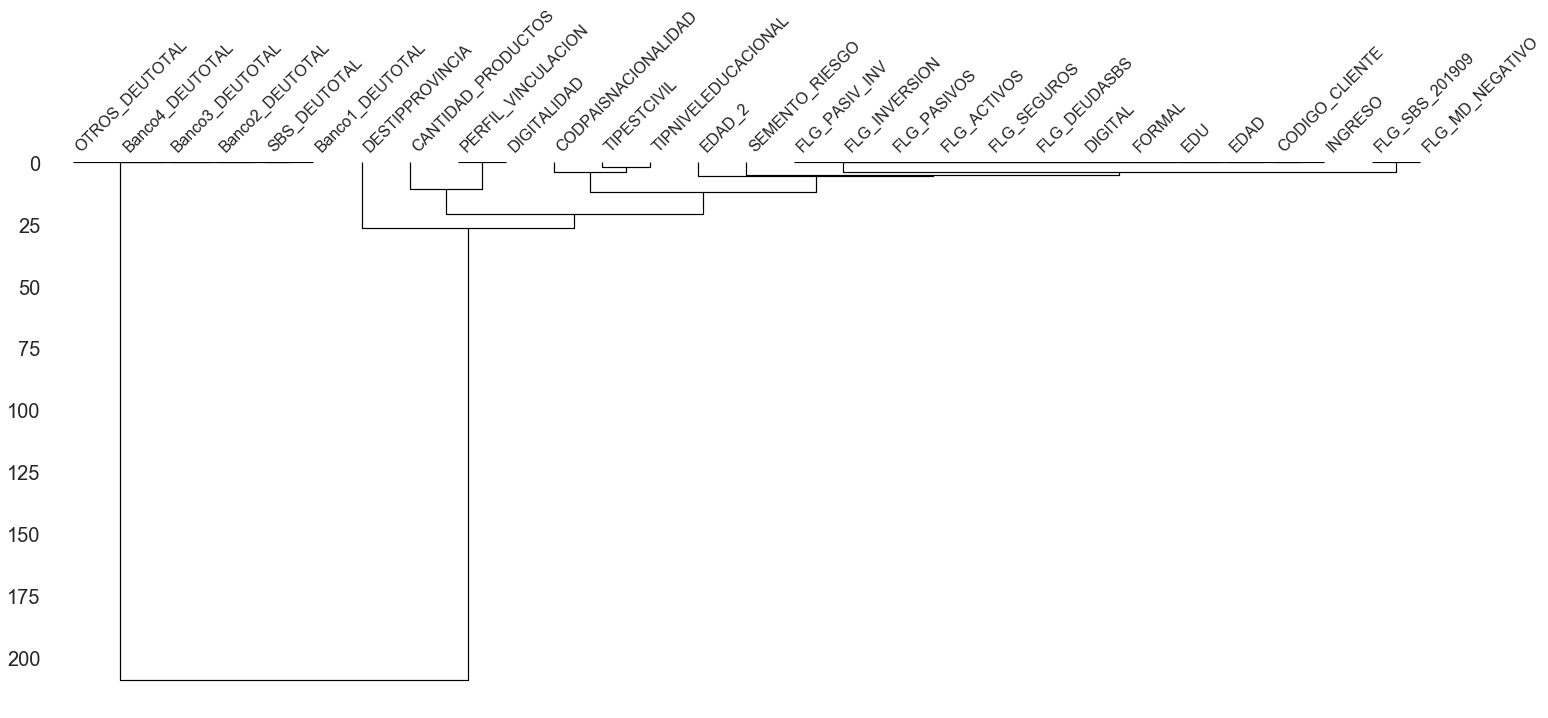

In [15]:
#dendograma de correlaciones de vacios
msno.dendrogram(data)
plt.show()

---
## 3. Correlaciones

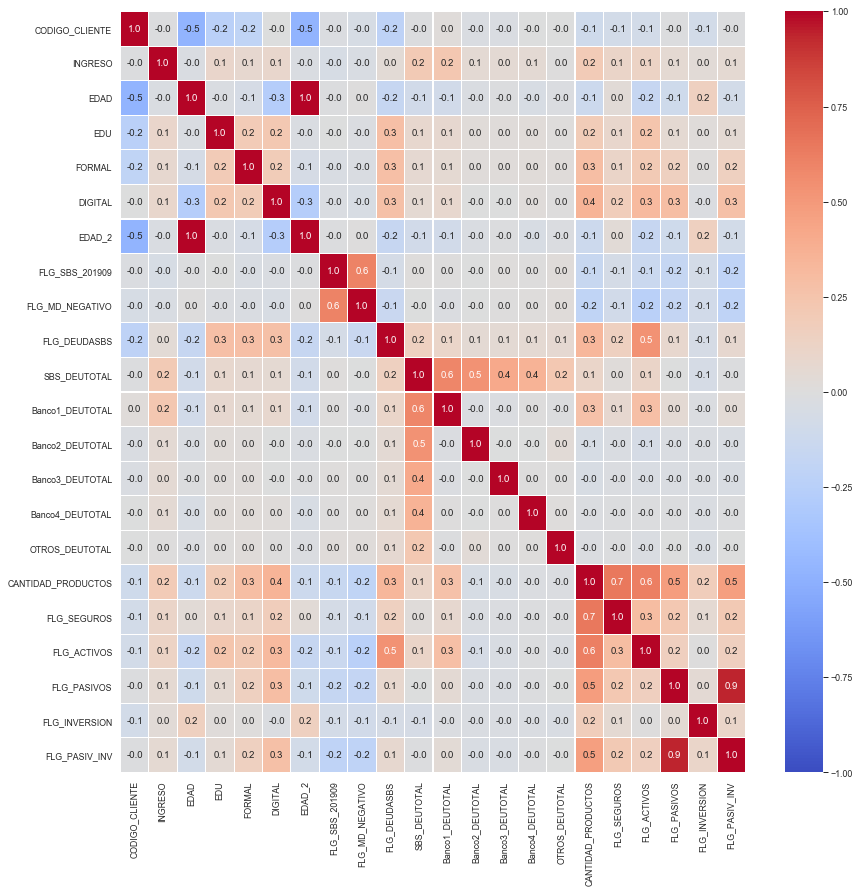

In [16]:
fig, (ax) = plt.subplots(1,1,figsize=(14,14))
sns.heatmap(data.corr(),
            ax = ax,
            vmin = -1, vmax = 1,
            cmap ="coolwarm",
            annot = True,
            fmt = ".1f",
            linewidths=.05,
            )
# fig.subplots_adjust(top=0.93)

## 4. EXPLORACIÓN DE VARIABLES

c:\users\christian\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


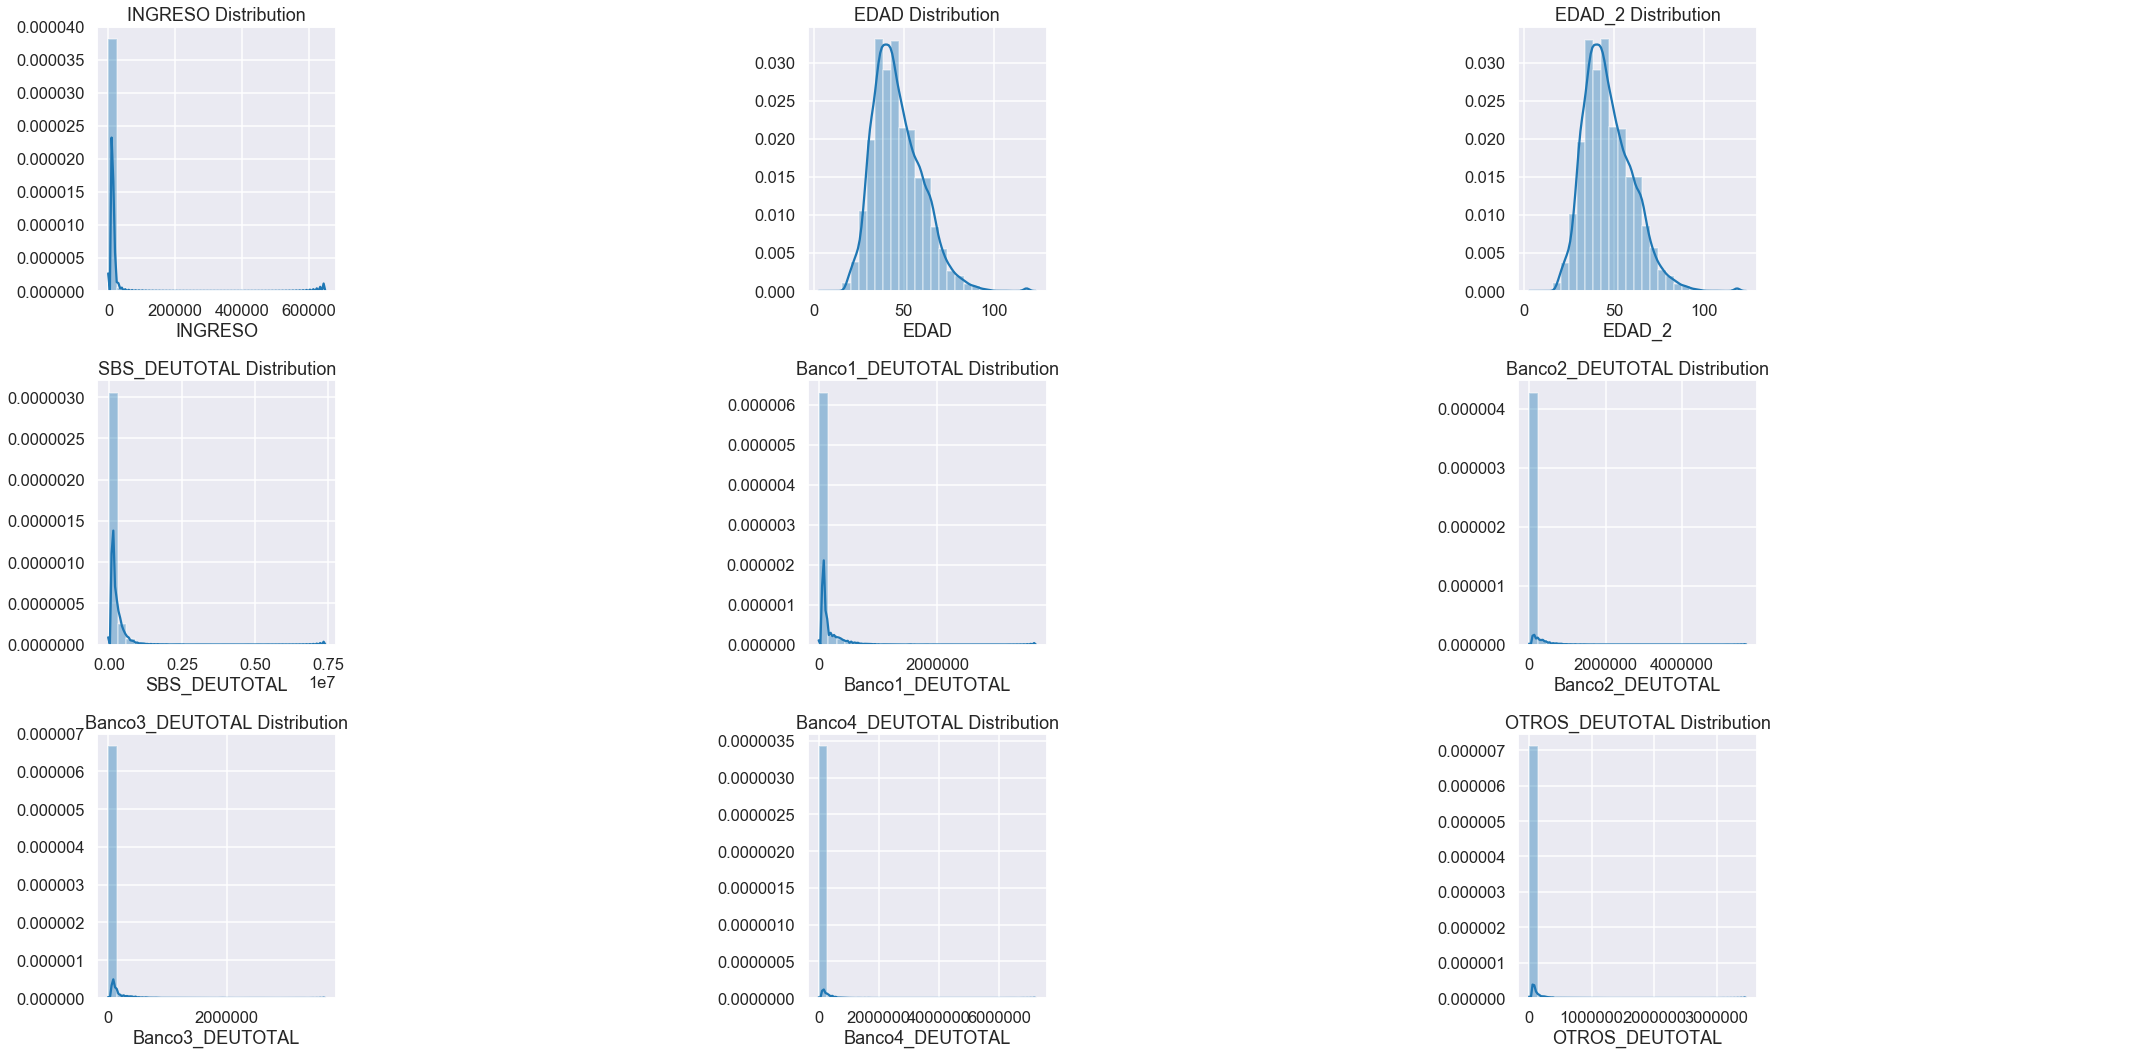

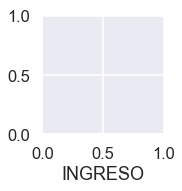

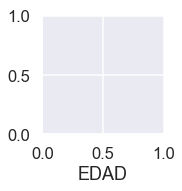

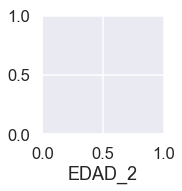

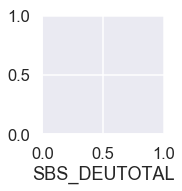

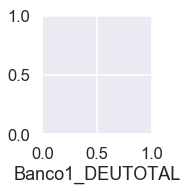

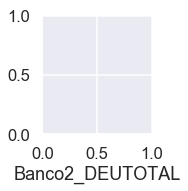

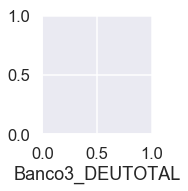

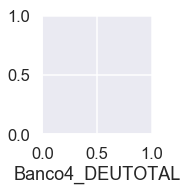

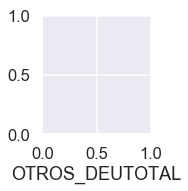

In [17]:
sns.set_style("darkgrid")
sns.set_context("talk")
continous_grid(data, variables_continuas, 3,6,25, 30, 0.5,0.3)
plt.show()

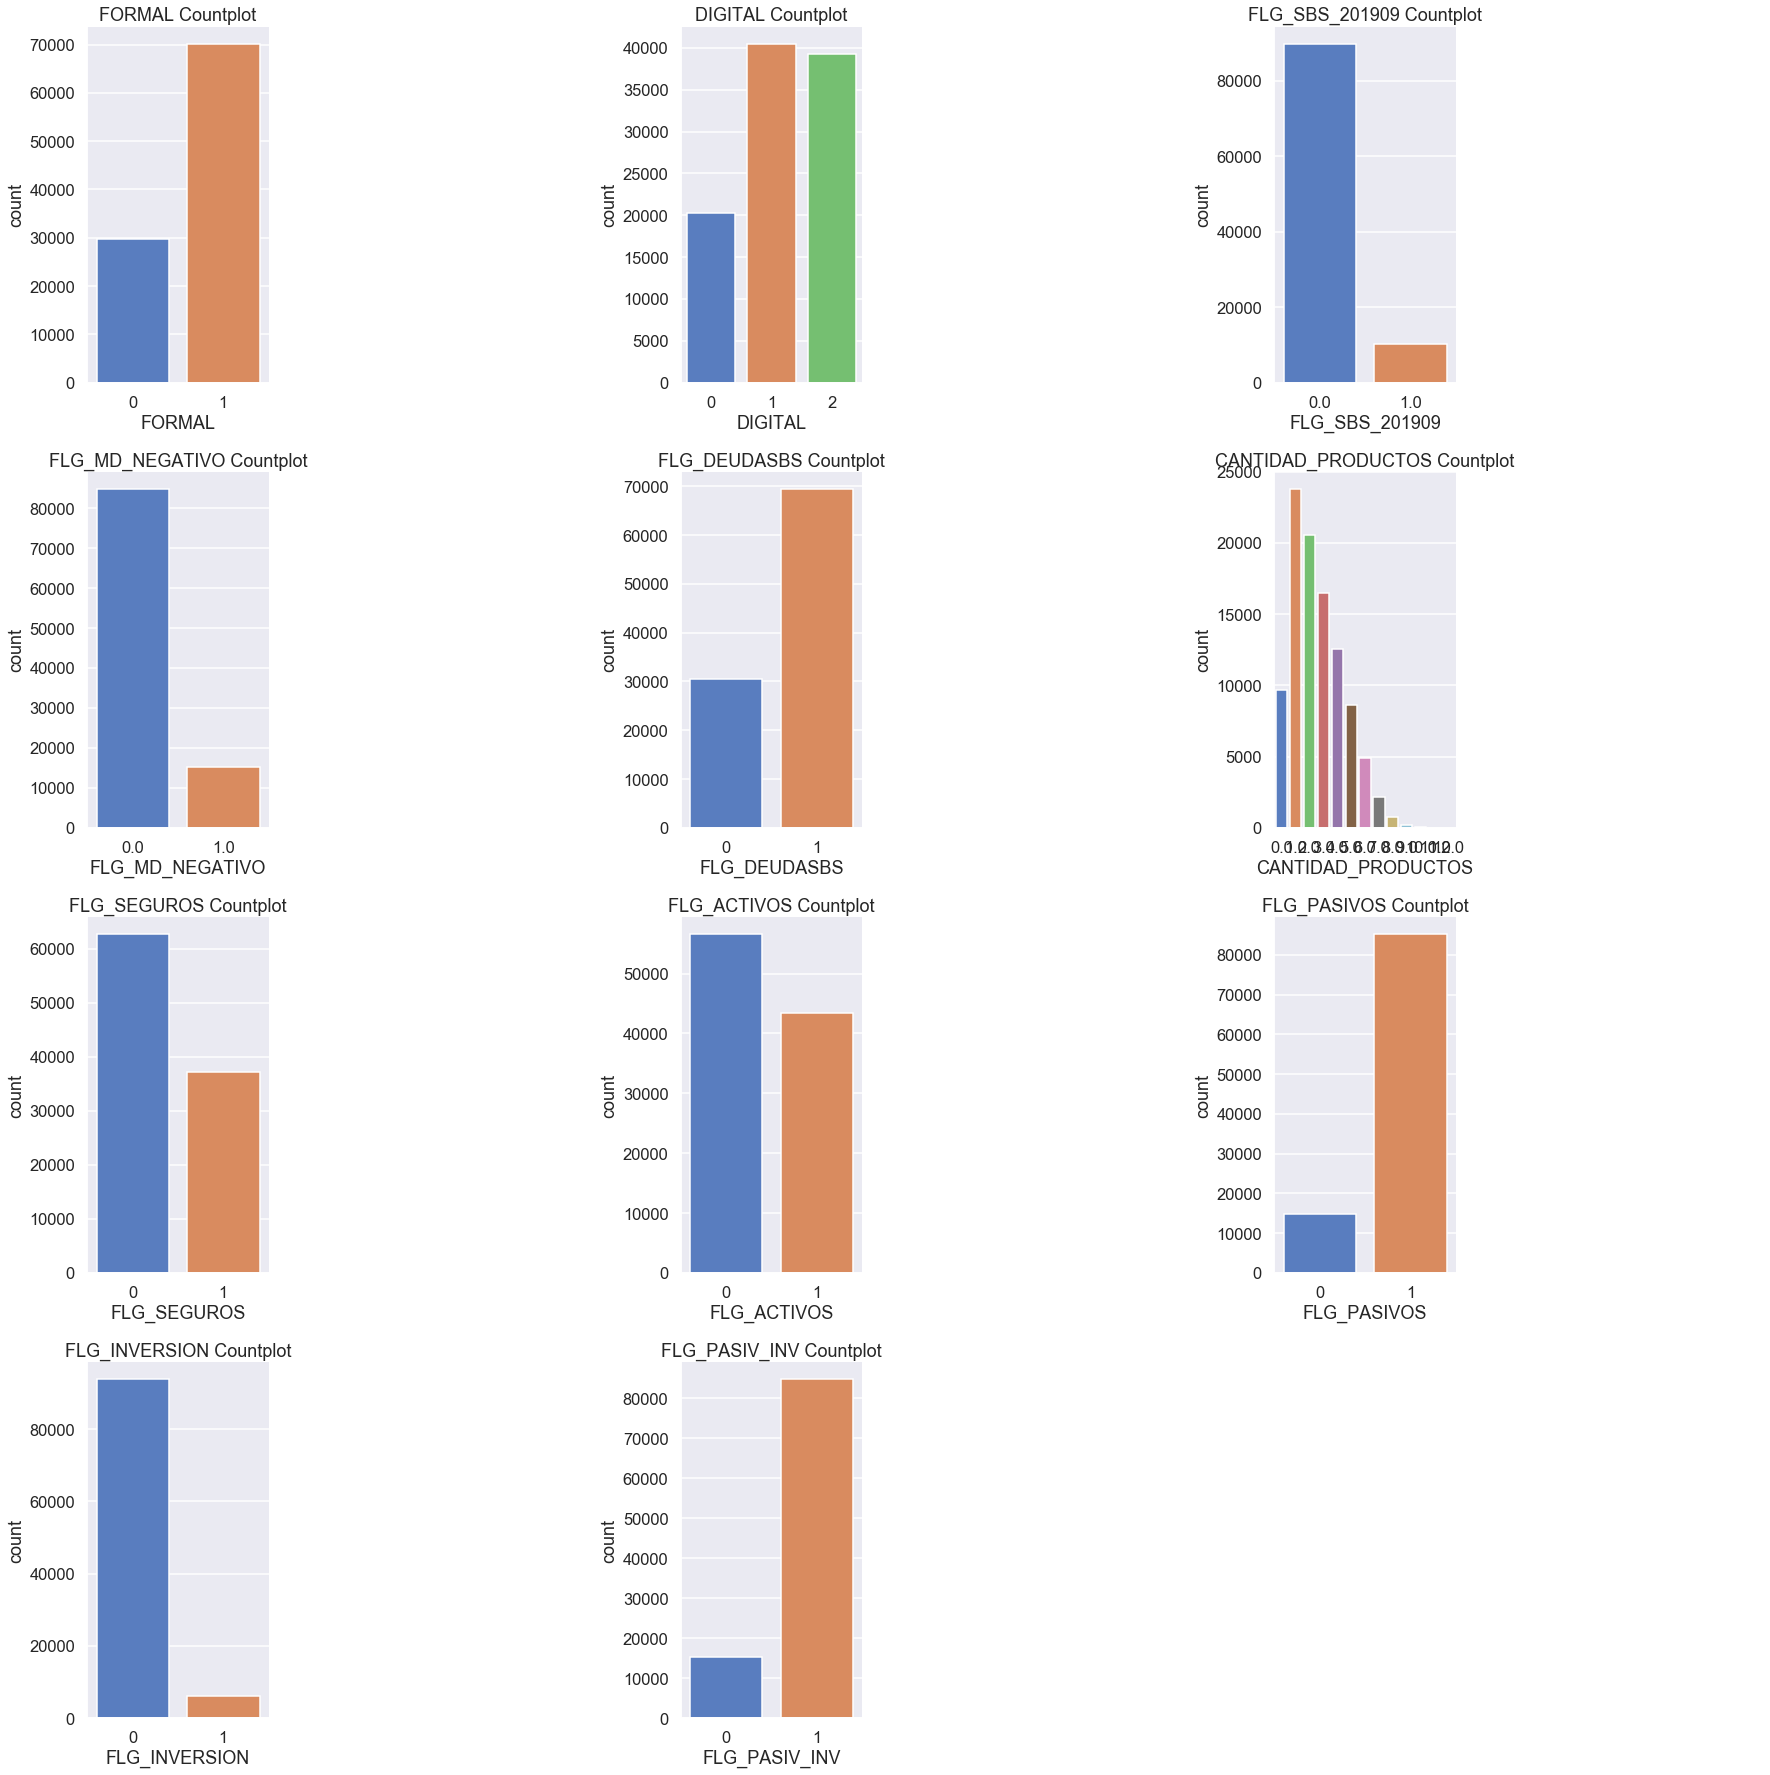

In [18]:
sns.set_style("darkgrid")
sns.set_context("talk")
discrete_grid(data, variables_discretas,4,6,25,1 )
plt.show()

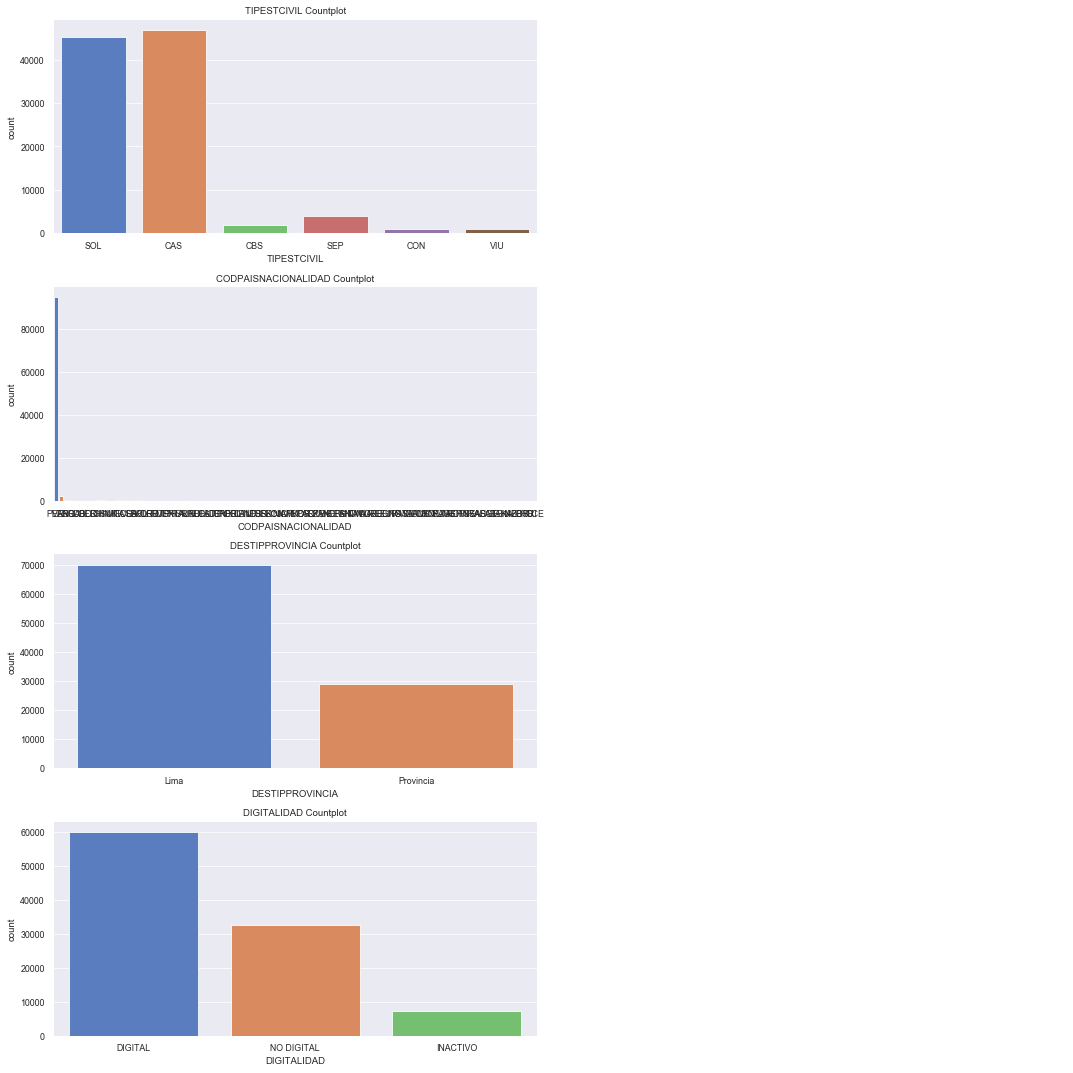

In [19]:
sns.set_style("darkgrid")
sns.set_context("paper")
discrete_grid(data, variables_nominales,4 ,2,15,1 )
plt.show()

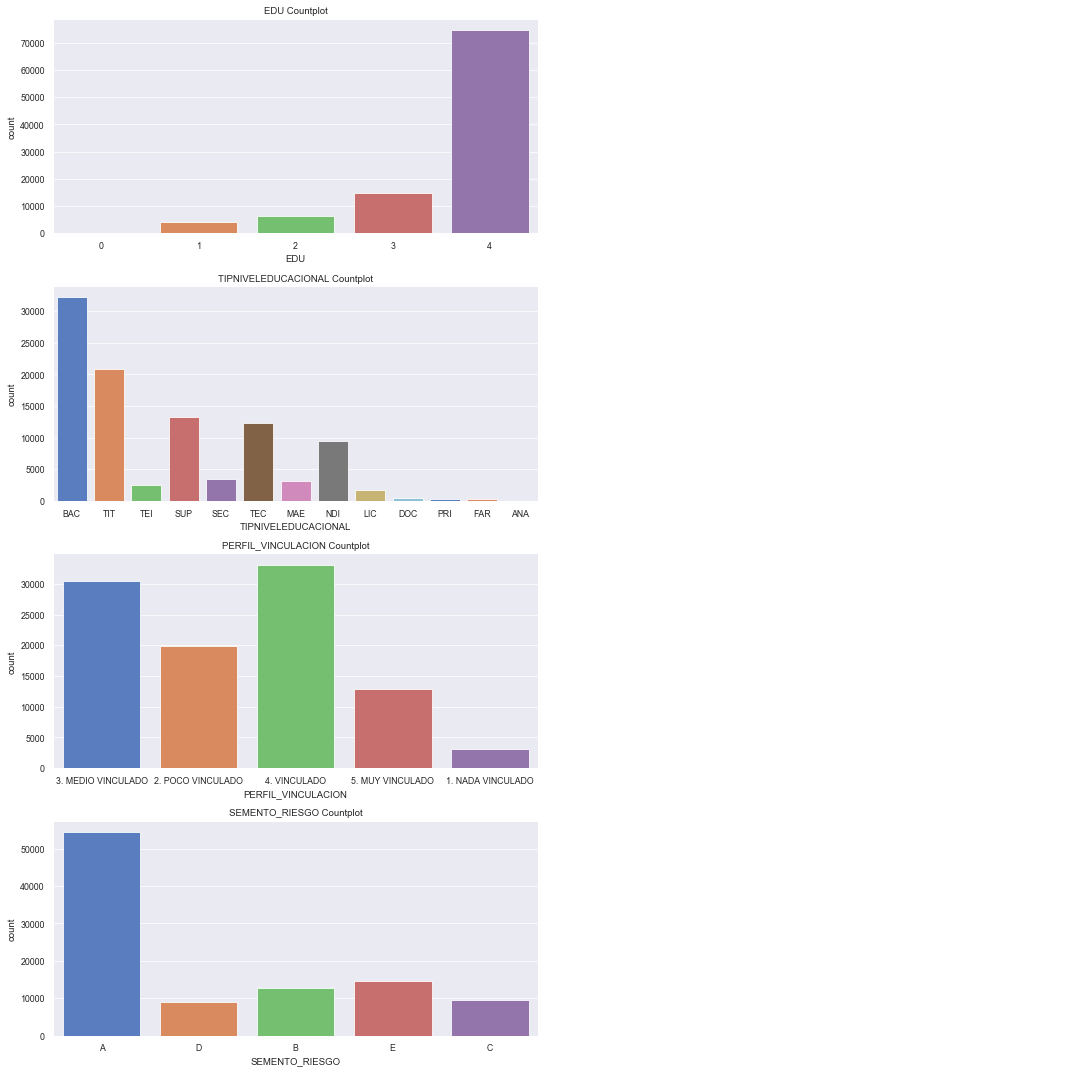

In [20]:
sns.set_style("darkgrid")
sns.set_context("paper")
discrete_grid(data, variables_ordinales,4,2,15,1 )
plt.show()

# PREPROCESAMIENTO

In [22]:
backup= data.copy(deep=True)
backup.shape

(100000, 29)

In [23]:
#Dropenando vacios
to_drop=['CODIGO_CLIENTE',
         'TIPESTCIVIL',
         'CODPAISNACIONALIDAD',
         'INGRESO',
         'EDAD',
         'EDU',
         'FORMAL',
         'DIGITAL',
         'DESTIPPROVINCIA',
         'EDAD_2',
         'TIPNIVELEDUCACIONAL',
         'FLG_SBS_201909',
         'FLG_MD_NEGATIVO',
         'PERFIL_VINCULACION',
         'FLG_DEUDASBS',         
         'DIGITALIDAD',
         'CANTIDAD_PRODUCTOS',
         'FLG_SEGUROS',
         'FLG_ACTIVOS',
         'FLG_PASIVOS',
         'FLG_INVERSION',
         'FLG_PASIV_INV',
         'SEMENTO_RIESGO']
         
data.dropna(axis=0,inplace=True,subset=to_drop)

In [24]:
data.shape

(98763, 29)

In [25]:
#elimino EDAD_2
data.drop("EDAD_2",axis=1,inplace=True)